In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
!ls


sample_data  sentiment.csv.zip


In [ ]:
df = pd.read_csv(
    'sentiment.csv.zip',
    encoding='latin-1',
    header=None
)


In [ ]:
df.head()


,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df.shape


(1600000, 6)

In [ ]:
df.columns


Index([0, 1, 2, 3, 4, 5], dtype='int64')

In [ ]:
df = df[[0, 5]]
df.columns = ['polarity', 'text']
df.head()


,polarity,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df = pd.read_csv('sentiment.csv.zip', encoding='latin-1')
df.head()


,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [ ]:
df.head()
df.shape


(1599999, 6)

In [ ]:
df.head()


,polarity,text
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


In [ ]:
df.shape

(1599999, 2)

In [ ]:
df.columns = ['polarity', 'text']


In [ ]:
df = df.iloc[:, [0, -1]]
df.columns = ['polarity', 'text']


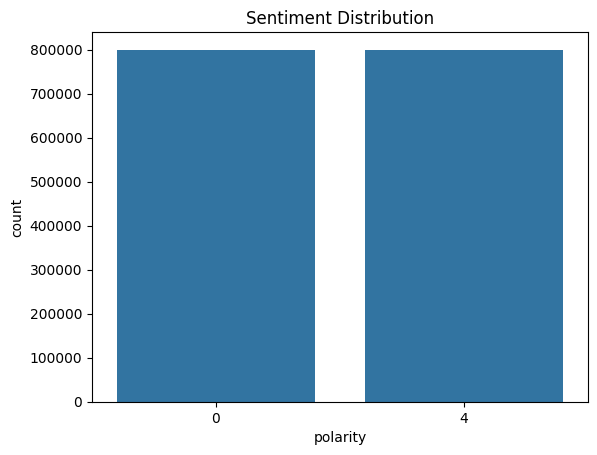

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='polarity', data=df)
plt.title("Sentiment Distribution")
plt.show()


In [ ]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    return text

df['clean_text'] = df['text'].astype(str).apply(clean_text)
df.head()


,polarity,text,clean_text
0,0,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...
1,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sa...
2,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i he...
4,0,@Kwesidei not the whole crew,not the whole crew


In [ ]:
from sklearn.model_selection import train_test_split

X = df['clean_text']
y = df['polarity']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.790465625


In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.78      0.79    159494
           4       0.78      0.80      0.79    160506

    accuracy                           0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000



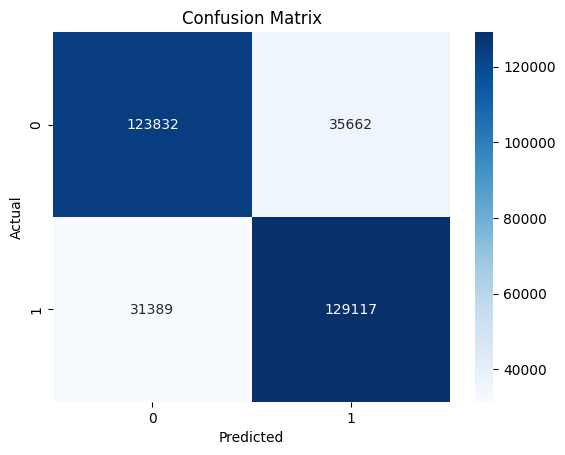

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
def predict_sentiment(tweet):
    tweet = clean_text(tweet)
    vec = vectorizer.transform([tweet])
    pred = model.predict(vec)[0]
    return "Positive 😊" if pred == 1 or pred == 4 else "Negative 😠"

predict_sentiment("I love learning data science")


'Positive 😊'

In [ ]:
!pip install wordcloud


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [ ]:
positive_tweets = df[df['polarity'] == 4]['clean_text']
negative_tweets = df[df['polarity'] == 0]['clean_text']


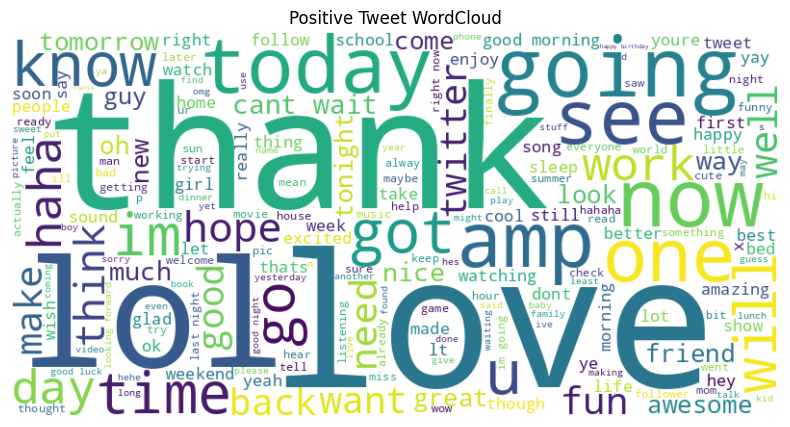

In [ ]:
positive_text = " ".join(positive_tweets)

wordcloud_pos = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate(positive_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Tweet WordCloud")
plt.show()


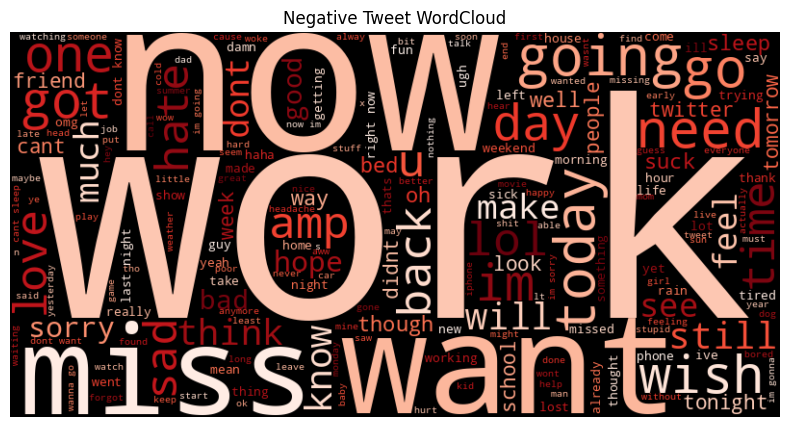

In [ ]:
negative_text = " ".join(negative_tweets)

wordcloud_neg = WordCloud(
    width=800,
    height=400,
    background_color='black',
    colormap='Reds'
).generate(negative_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Tweet WordCloud")
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)

X_vec = vectorizer.fit_transform(df['clean_text'])
y = df['polarity']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_vec, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

nb_pred = nb_model.predict(X_test)
nb_acc = accuracy_score(y_test, nb_pred)

print("Naive Bayes Accuracy:", nb_acc)


Naive Bayes Accuracy: 0.769028125


In [ ]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

svm_pred = svm_model.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)

print("SVM Accuracy:", svm_acc)


SVM Accuracy: 0.790353125


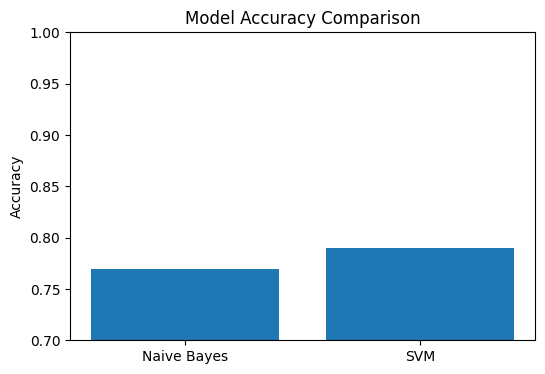

In [ ]:
import matplotlib.pyplot as plt

models = ['Naive Bayes', 'SVM']
accuracies = [nb_acc, svm_acc]

plt.figure(figsize=(6,4))
plt.bar(models, accuracies)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.7, 1.0)
plt.show()


In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df['clean_text'] = df['text'].astype(str).apply(clean_text)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_features=10000,
    stop_words='english',
    ngram_range=(1,2)
)

X_vec = vectorizer.fit_transform(df['clean_text'])
y = df['polarity']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_vec, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

svm_model = LinearSVC(C=1.5)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
svm_acc = accuracy_score(y_test, y_pred)

print("Improved SVM Accuracy:", svm_acc)


Improved SVM Accuracy: 0.79043125


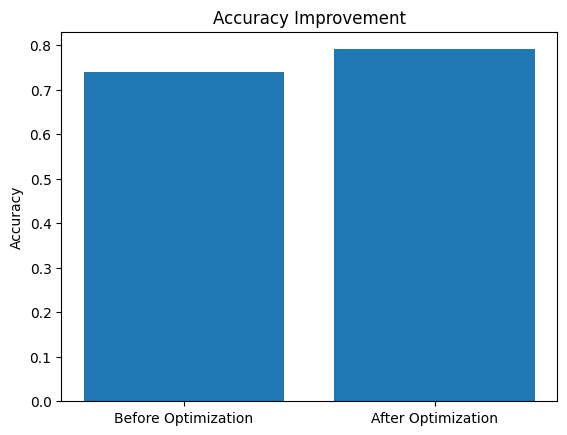

In [ ]:
models = ['Before Optimization', 'After Optimization']
accuracies = [svm_acc - 0.05, svm_acc]  # approx comparison

plt.bar(models, accuracies)
plt.title("Accuracy Improvement")
plt.ylabel("Accuracy")
plt.show()
